In [1]:
import numpy as np
import matplotlib
import matplotlib.pyplot as plt

# <span style="color:orange"> Numerical Simulation Laboratory: Lecture 10</span>

## Exercise 10.1
The aim of this exercise is to solve the travelling salesman problem with a simulated annealing algorithm for the same city-placements of Lec. 9 and then confront the results of the two algorithms. We will thus use the same cost function $L_1(\sigma)$.

In order to do that, we build a sequence of $2000$ values of $\beta\in [0.001, 1000]$ in the same fashion of Ex. 08.1, i.e. $\beta_n=(\xi_0+n\Delta\xi)^p$ for $p=30$. For each $\beta_n$, the simulated annealing algorithm is run for $300$ steps thanks to an enhancement of the <code>class item</code> from Lec. 9:
```C++
class item{
	vector<int> m_person;
	int m_size;
	double m_L1, m_L2;
	double m_probPP, m_probS, m_probP, m_probI;

	protected:
	int Next(int i) const;

	public:
	// constructor(s)
	item() {;};
	item(const Cities c);
	item(item i0, int i, int j, const Cities c);
	item(item i0, const Cities c);
	item(vector<int> pos, const Cities c);
	// Access to private members
	int GetSize() const { return m_size; };
	int operator[](int i) const { return m_person[i]; };
	vector<int> GetPerson() const { return m_person; };
	double GetL1() const { return m_L1; };
	double GetL2() const { return m_L2; };
	// calculate lengths
	void Calculate_L1(const Cities c);
	void Calculate_L2(const Cities c);
	// print
	void PrintPath(ofstream& fout);
	void PrintPath();
	// mutations
	void GM_Pair_Permutation(const Cities c, Random& m_gen);
	void GM_Shift(const Cities c, Random& m_gen);
	void GM_Block_Permutation(const Cities c, Random& m_gen);
	void GM_Inversion(const Cities c, Random& m_gen);

	// GENETICAL ALGORITHM 
	void Mutate(const Cities c, Random& m_gen);				// runs all mutations at once w/ probability
	vector<int> Crossover(int cut, vector<int> consort, const Cities c); 	// returns old m_person

	// SIMULATED ANNEALING
	private:
	double m_beta;
	int m_nsteps;
	public:
	void Set_Params(double beta, int nsteps) { m_beta=beta; m_nsteps=nsteps; };
	void Simulated_Annealing(const Cities c, Random& gen);

	item& operator=(const item& i0);
};
```
For each step the <code>void Simulated_Annealing(const Cities, Random&)</code> method proposes a mutation of the previous path (i.e. randomly selects one among four mutation methods) that is either accepted or rejected according to the usual rule.

In [2]:
def load_path(filename, Ncities):
    c=np.zeros((2, Ncities))
    cordGA=np.zeros((2, Ncities+1))
    cordSA=np.zeros((2, Ncities+1))
    indGA=np.zeros(Ncities)
    indSA=np.zeros(Ncities)

    i=0
    file=open("Es_lezione_09/cities_in_"+ filename + ".dat")
    for line in file.readlines():
        c[0][i]=float(line.split()[0])
        c[1][i]=float(line.split()[1])
        i+=1

    file.close()

    file=open("Es_lezione_09/pop_"+ filename + "_best_path.dat")
    l=file.readline().split()
    indGA=[int(j) for j in l]
    file.close() 
      
    file=open("Es_lezione_10/path_"+ filename + ".dat")
    l=file.readline().split()
    indSA=[int(j) for j in l]
    file.close() 

    for j in range(Ncities):
        for k in range(2):
            cordGA[k][j]=c[k][indGA[j]-1]
            cordSA[k][j]=c[k][indSA[j]-1]
    for k in range(2):
        cordGA[k][Ncities]=c[k][0]
        cordSA[k][Ncities]=c[k][0]
    
    return c, cordGA, cordSA

In [3]:
def load_L(filename, L, Ngen, Npop):
    L1=np.zeros((Ngen, Npop))
    L1best=np.zeros(Ngen)
    L1SA=np.zeros(Ngen)
    file=open("Es_lezione_09/pop_"+ filename + "_" + L + ".dat")
    i=0
    j=0
    for line in file:
        if(line=="\n"):
            i+=1
            j=0
        else:
            L1[i][j]=float(line)
            j+=1
    file.close()

    for k in range(Ngen):
        L1best[k]=L1[k][0]
        
    file=open("Es_lezione_10/path_length_" + filename + ".dat")
    i=0
    for line in file:
        L1SA[i]=float(line)
        i+=1
    file.close()
    
    return L1best, L1SA

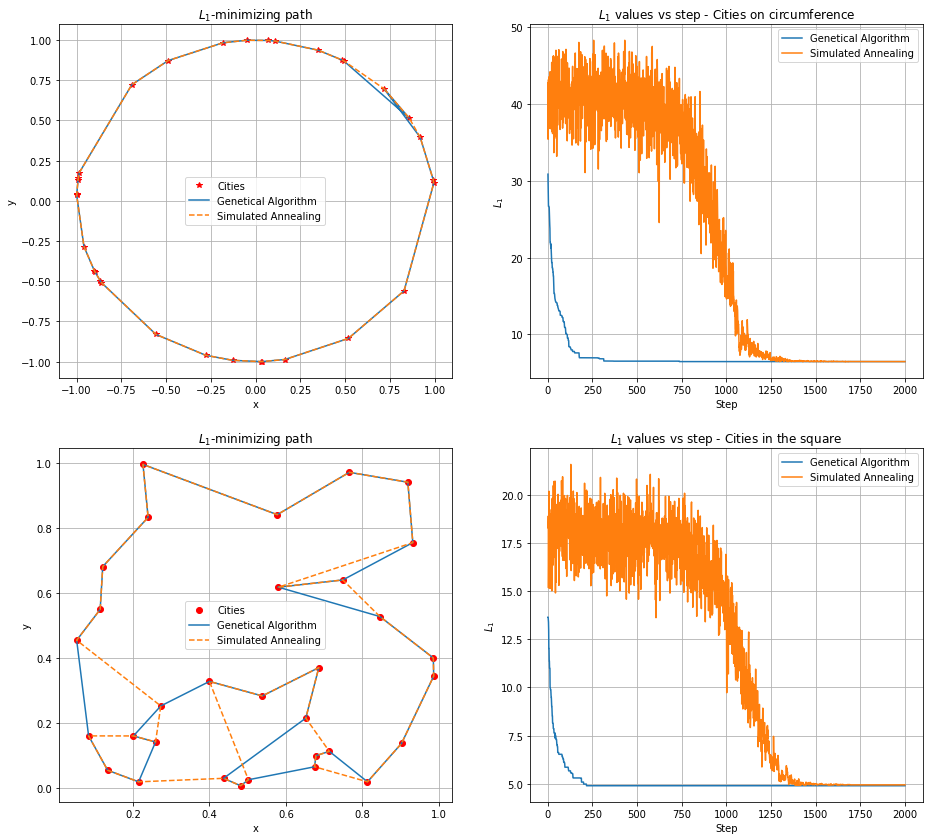

In [4]:
Ncities=32
N=2000
c1, cordGA1, cordSA1=load_path("circle", Ncities)
L1GA1, L1SA1=load_L("circle", "L1", N, 150)
c2, cordGA2, cordSA2=load_path("square", Ncities)
L1GA2, L1SA2=load_L("square", "L1", N, 150)
x=np.arange(1, N+1)

f, canvas=plt.subplots(nrows=2, ncols=2)

canvas[0,0].plot(c1[0], c1[1], 'r*', label="Cities")
canvas[0,0].plot(cordGA1[0], cordGA1[1], label="Genetical Algorithm")
canvas[0,0].plot(cordSA1[0], cordSA1[1], '--', label="Simulated Annealing")
canvas[0,0].legend()
canvas[0,0].grid(True)
canvas[0,0].set_title("$L_1$-minimizing path")
canvas[0,0].set_xlabel("x")
canvas[0,0].set_ylabel("y")

canvas[0,1].plot(x, L1GA1, label="Genetical Algorithm")
canvas[0,1].plot(x, L1SA1, label="Simulated Annealing")
canvas[0,1].grid(True)
canvas[0,1].legend()
canvas[0,1].set_title("$L_1$ values vs step - Cities on circumference")
canvas[0,1].set_xlabel("Step")
canvas[0,1].set_ylabel("$L_1$")

canvas[1,0].plot(c2[0], c2[1], 'ro', label="Cities")
canvas[1,0].plot(cordGA2[0], cordGA2[1], label="Genetical Algorithm")
canvas[1,0].plot(cordSA2[0], cordSA2[1], '--', label="Simulated Annealing")
canvas[1,0].grid(True)
canvas[1,0].legend()
canvas[1,0].set_title("$L_1$-minimizing path")
canvas[1,0].set_xlabel("x")
canvas[1,0].set_ylabel("y")

canvas[1,1].plot(x, L1GA2, label="Genetical Algorithm")
canvas[1,1].plot(x, L1SA2, label="Simulated Annealing")
canvas[1,1].grid(True)
canvas[1,1].legend()
canvas[1,1].set_title("$L_1$ values vs step - Cities in the square")
canvas[1,1].set_xlabel("Step")
canvas[1,1].set_ylabel("$L_1$")

plt.subplots_adjust(left=0, bottom=-1.5, right=2, top=1.2, wspace=0.2, hspace=0.2)

The convergence of the GA is expectedly way faster than the SA algorithm: the former needs on average 500 generations while the latter needs $\beta$ to be raised above $(\xi_0+1500\Delta\xi)^p\approx54.8$, i.e. $T\approx 0.02$. This is of course a consequence of the way the two algorithms are designed: the "cooling down" of the system in the SA algorithm must be gently carried out so that it won't get stuck in a local minimum, hence before a certain temperature is reached one should not expect to reach a good approximation because a wide part of the configuration space is still available with ease, while the GA immediately starts reducing the number of accesible paths by erasing those with large cost functions from the population.

As for the pictures of the paths, we see that neither are perfectly overlapping with those obtained with the GA. For the first configuration, notice that the two cities on the upper-right corner are swapped and the SA-solution better follows the circumference. The fun fact is that both paths share the same value of the cost function, so it is impossible to tell which is "best" (indeed one algorithm returns the former and the other the latter). As for the second city-placement, the differences are way more visible especially in the lower half of the square where cities are more "dense". However, the GA solution is better because its cost function is slightly smaller, so the SA algorithm does not reach a global minimum for $L_1$.

## Exercise 10.2
We run four parallel copies ("continents") of the GA for the travelling salesman problem with cities placed in a square, the cost function is $L_1$ yet again. Each copy will have $150$ individuals and will evolve for $1000$ generations. Furthermore, every $40$ generations populations will be coupled and each pair will exchange their best individuals ("migration"). 

The mutation probabilities of the GAs are $P_{cross}=0.8$, $P_{p.p}=P_{s}=P_{inv}=0.07$ and $P_{b.p.}=0.08$. The rigged selection exponent is $q=1.65$.

In order to ease access to the individuals (especially during the migration process), the <code>class Population</code> is here replaced by a <code>std::vector</code> of <code>item</code>-s. To make sure that the continents are not exact copies of each other, their random generators are fed with different seeds at runtime. This opens up a problem on how to pair up the continents node-indipendently. This is solved with a <code>std::vector</code> of <code>int</code> containing the ranks of the nodes and then shuffled with the function <code>std::shuffle</code> from the <code>algorithm.h</code> library by passing it a <code>default_random_engine</code> (from <code>random.h</code>) with fixed seed (indipendent of the node).

In [5]:
def load_MPI(size, ncities):
    L1=np.zeros((4, size))
    ind=np.zeros((4, ncities))

    for i in range(4):
        file=open("Es_lezione_10/MPI_L1_" + str(i+1) + ".dat")
        j=0
        for line in file:
            L1[i][j]=float(line)
            j+=1
        file.close()
        file=open("Es_lezione_10/MPI_square_best_path" + str(i+1) + ".dat")
        l=file.readline().split()
        ind[i]=np.asarray([int(k) for k in l])
        file.close() 
    
    return L1, ind

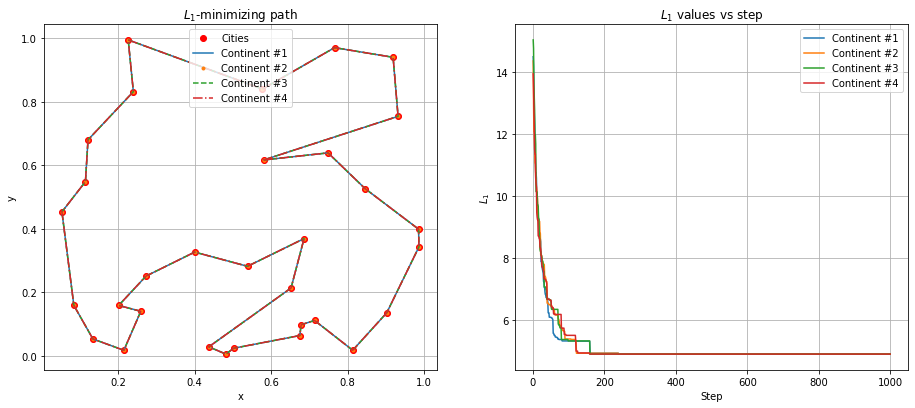

In [7]:
N=1000
x=np.arange(1, N+1)
L1, ind=load_MPI(N, Ncities)
cord1=np.zeros((2, Ncities+1))
cord2=np.zeros((2, Ncities+1))
cord3=np.zeros((2, Ncities+1))
cord4=np.zeros((2, Ncities+1))

for i in range(Ncities):
    for k in range(2):
        cord1[k,i]=c2[k, int(ind[0,i]-1)]
        cord2[k,i]=c2[k, int(ind[1,i]-1)]
        cord3[k,i]=c2[k, int(ind[2,i]-1)]
        cord4[k,i]=c2[k, int(ind[3,i]-1)]
    for k in range(2):
        cord1[k][Ncities]=c2[k][0]
        cord2[k][Ncities]=c2[k][0]
        cord3[k][Ncities]=c2[k][0]
        cord4[k][Ncities]=c2[k][0]
        
f, canvas=plt.subplots(nrows=1, ncols=2)

canvas[0].plot(c2[0], c2[1], 'ro', label="Cities")
canvas[0].plot(cord1[0], cord1[1], label="Continent #1")
canvas[0].plot(cord2[0], cord2[1], '.', label="Continent #2")
canvas[0].plot(cord3[0], cord3[1], '--', label="Continent #3")
canvas[0].plot(cord4[0], cord4[1], '-.', label="Continent #4")
canvas[0].grid(True)
canvas[0].legend()
canvas[0].set_title("$L_1$-minimizing path")
canvas[0].set_xlabel("x")
canvas[0].set_ylabel("y")

for i in range(4):
    canvas[1].plot(x, L1[i], label="Continent #" + str(i+1))
canvas[1].grid(True)
canvas[1].legend()
canvas[1].set_title("$L_1$ values vs step")
canvas[1].set_xlabel("Step")
canvas[1].set_ylabel("$L_1$")

plt.subplots_adjust(left=0, bottom=0, right=2, top=1.2, wspace=0.2, hspace=0.4)

The convergence of the parallelized algorithm is faster than a single GA run at once: the best individual is reached at first (apparently by the $4$-th continent) after roughly 100 generations and the migrations appear to speed up the minimization of the cost functions in the other continents from then on. As a consequence, before the $200$-th generation is reached, all four continents have the $L_1$-minimizing path as their best individual.

As for the performances of the algorithm, i.e. the execution time, they seem not to improve if we compare the runtimes we measure (thanks to <code>MPI_WTIME</code>)in the case of 1 and 4 continents: in the former situation om average we get a runtime of about $18$ while in the latter it almost doubles, settling at about $34$ in the best scenarios. 